In [1]:
from reachy_sdk import ReachySDK
from reachy_sdk.trajectory import goto
import time
import numpy as np
from scipy.spatial.transform import Rotation as R
import threading
from matplotlib import pyplot as plt
reachy = ReachySDK(host='localhost')

In [9]:
def rec():
    
    recorded_joints = [
        reachy.r_arm.r_shoulder_pitch,
        reachy.r_arm.r_shoulder_roll,
        reachy.r_arm.r_arm_yaw,
        reachy.r_arm.r_elbow_pitch,
        reachy.r_arm.r_forearm_yaw,
        reachy.r_arm.r_wrist_pitch,
        reachy.r_arm.r_wrist_roll,
    ]

    trajectories = []
    sampling_frequency = 100 
    start = time.time()
    while (time.time() - start) < 15:
        # We here get the present position for all of recorded joints
        current_point = [joint.present_position for joint in recorded_joints]
        # Add this point to the already recorded trajectories
        trajectories.append(current_point)

        time.sleep(1 / sampling_frequency)
    plt.figure()
    plt.plot(np.array(trajectories)[:,0])
    plt.savefig('r_shoulder_pitch.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,1])
    plt.savefig('r_shoulder_roll.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,2])
    plt.savefig('r_arm_yaw.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,3])
    plt.savefig('r_elbow_pitch.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,4])
    plt.savefig('r_forearm_yaw.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,5])
    plt.savefig('r_wrist_pitch.png')
    plt.figure()
    plt.plot(np.array(trajectories)[:,6])
    plt.savefig('r_wrist_roll.png')

NameError: name 'trajectories' is not defined

<Figure size 432x288 with 0 Axes>

<Holder
	<Joint name="r_shoulder_pitch" pos="-3.05" mode="compliant">
	<Joint name="r_shoulder_roll" pos="-2.44" mode="compliant">
	<Joint name="r_arm_yaw" pos="12.62" mode="compliant">
	<Joint name="r_elbow_pitch" pos="-87.08" mode="compliant">
	<Joint name="r_forearm_yaw" pos="-2.79" mode="compliant">
	<Joint name="r_wrist_pitch" pos="1.36" mode="compliant">
	<Joint name="r_wrist_roll" pos="2.20" mode="compliant">
	<Joint name="r_gripper" pos="-21.26" mode="compliant">
>


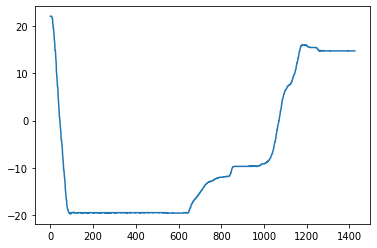

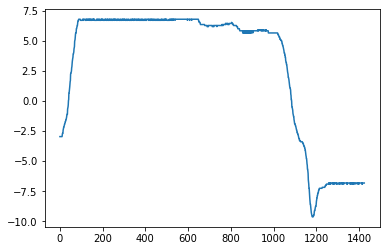

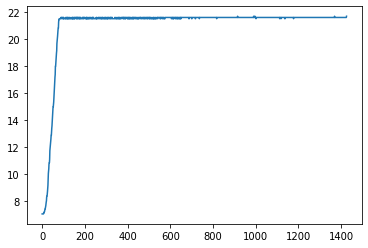

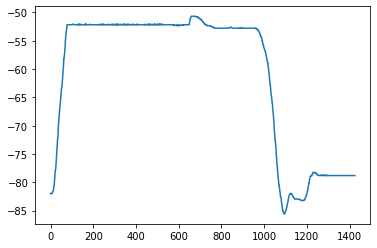

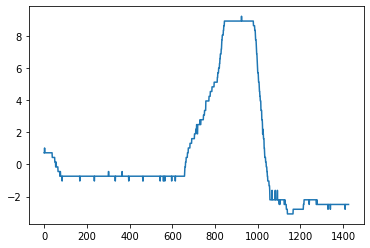

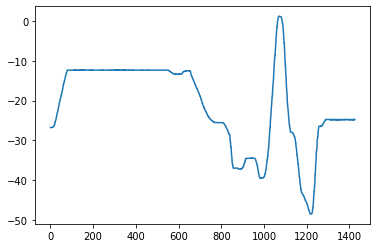

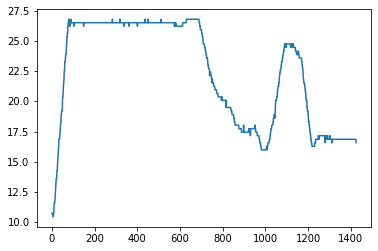

In [29]:
print(reachy.joints)

In [4]:
re = reachy.r_arm.forward_kinematics()
print(re)

[[ 0.09810444 -0.26562305 -0.95907242  0.35287383]
 [ 0.01921073  0.96404719 -0.26503577 -0.146523  ]
 [ 0.99499069  0.00757671  0.09968013 -0.29105487]
 [ 0.          0.          0.          1.        ]]


In [34]:
reachy.turn_on('r_arm')

In [23]:
start_p = np.array([[ 0.098, -0.26, -0.96, 0.25],
 [ 0.019,  0.96, -0.26, -0.14,  ],
 [ 0.99,  0.007,  0.099, -0.29],
 [ 0., 0., 0., 1.]])
j_start = reachy.r_arm.inverse_kinematics(start_p)
goto({joint: pos for joint,pos in zip(reachy.r_arm.joints.values(), j_start)}, duration=1.0)
time.sleep(1)

t = threading.Thread(target=rec)
t.start()

print(reachy.joints)
start_p[0][3] = start_p[0][3] + 0.25
# start_p[1][3] = start_p[1][3] + 0.05
start_p[2][3] = start_p[2][3] + 0.05
# print(re)
j = reachy.r_arm.inverse_kinematics(start_p)
print('joint_theo= ' + str(j))
dic ={reachy.r_arm.r_shoulder_pitch: j[0],
            reachy.r_arm.r_shoulder_roll:j[1],
            reachy.r_arm.r_arm_yaw: j[2],
            reachy.r_arm.r_elbow_pitch: j[3],
            reachy.r_arm.r_forearm_yaw: j[4],
            reachy.r_arm.r_wrist_pitch: j[5],
            reachy.r_arm.r_wrist_roll: j[6]}

goto(goal_positions=dic, duration=1.0)



<Holder
	<Joint name="r_shoulder_pitch" pos="23.85" mode="stiff">
	<Joint name="r_shoulder_roll" pos="-1.38" mode="stiff">
	<Joint name="r_arm_yaw" pos="8.04" mode="stiff">
	<Joint name="r_elbow_pitch" pos="-104.84" mode="stiff">
	<Joint name="r_forearm_yaw" pos="2.20" mode="stiff">
	<Joint name="r_wrist_pitch" pos="1.19" mode="stiff">
	<Joint name="r_wrist_roll" pos="6.01" mode="stiff">
	<Joint name="r_gripper" pos="-45.01" mode="stiff">
>
joint_theo= [-28.88575889287172, 1.6739290141123642, 6.252248991710104, -64.96469833814885, -1.1026895456073391, 9.548618084836916, 8.794431875598995]


In [27]:
with open('list.npy', 'rb') as f:
    joint_poses = np.load(f)
    print(joint_poses)
    
t = threading.Thread(target=rec)
t.start()
prec = reachy.r_arm.r_shoulder_pitch.present_position
prec1 = reachy.r_arm.r_shoulder_roll.present_position
# for i in range(len(joint_poses)):
i = -1
dic ={
            reachy.r_arm.r_shoulder_pitch: joint_poses[i][0],
            reachy.r_arm.r_shoulder_roll: joint_poses[i][1],
        reachy.r_arm.r_arm_yaw: joint_poses[i][2],
        reachy.r_arm.r_elbow_pitch: joint_poses[i][3],
        reachy.r_arm.r_forearm_yaw: joint_poses[i][4],
        reachy.r_arm.r_wrist_pitch: joint_poses[i][5],
        reachy.r_arm.r_wrist_roll: joint_poses[i][6]}
print(prec-joint_poses[i][0])
print(prec1-joint_poses[i][1])
# if (abs(prec-joint_poses[i][0]) > 5):
#     prec = joint_poses[i][0]
#     dic[reachy.r_arm.r_shoulder_pitch] = joint_poses[i][0]
# if (abs(prec1-joint_poses[i][1]) > 5):
#     dic[reachy.r_arm.r_shoulder_roll] = joint_poses[i][1]
#     prec1 = joint_poses[i][1]

goto(goal_positions=dic, duration=0.75)
time.sleep(1)

[[ -1.16742571  -2.17929221  19.71257152 -83.0012648   -2.45901814
   -6.62166986  25.38611282]
 [-10.76684096   2.64628223  23.17298099 -75.34115445  -1.82470642
   -3.71609084  26.60834466]
 [-15.93703039   5.92592033  24.5584374  -69.07773416  -1.36604223
   -3.98973754  26.52271521]
 [-19.4913946    7.72159729  25.04024068 -66.66400446  -1.51618402
   -2.47125274  26.85006469]
 [-20.52466432  10.35178327  23.72611064 -62.99611729   0.74643464
   -4.12670153  19.57028378]
 [-21.2844544   12.74070057  22.53136723 -61.21866548   2.91592898
   -4.2728204   12.05661385]
 [-23.21807351   9.67017633  22.32347227 -62.49643325  -0.38799873
   -2.41904183  21.04219575]
 [-20.96527959  12.56684141  21.78474664 -56.55110897   3.24835845
   -9.2953297   10.82060004]
 [-22.75814396   8.21193907  22.58809765 -53.21242726  -1.58420341
  -12.70768154  26.71546751]]
44.75814395631748
-11.181939068751914


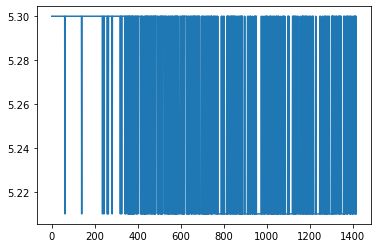

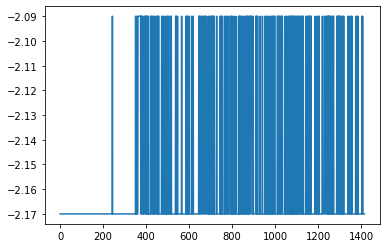

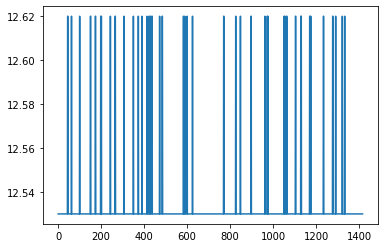

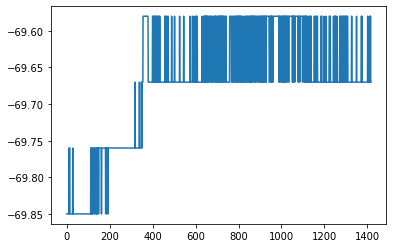

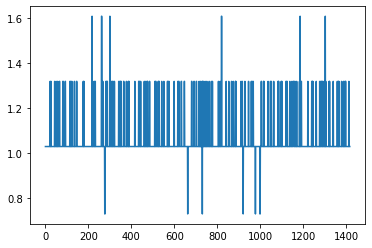

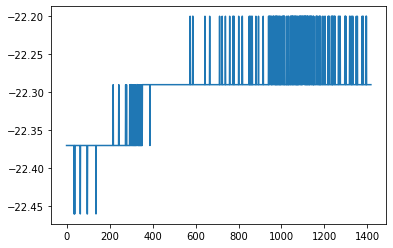

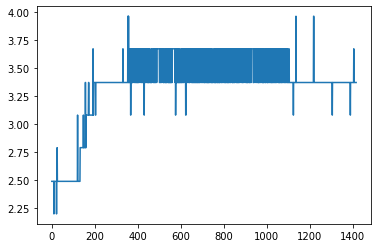

In [35]:
dic ={
    reachy.r_arm.r_shoulder_pitch: 0,
    reachy.r_arm.r_shoulder_roll: -2.44,
    reachy.r_arm.r_arm_yaw: 12.62,
    reachy.r_arm.r_elbow_pitch: -87.08,
    reachy.r_arm.r_forearm_yaw: -2.79,
    reachy.r_arm.r_wrist_pitch: 1.36,
    reachy.r_arm.r_wrist_roll: 2.20}
t = threading.Thread(target=rec)
t.start()
prec = reachy.r_arm.r_shoulder_pitch.present_position
prec1 = reachy.r_arm.r_shoulder_roll.present_position
for i in range(7):
    dic[reachy.r_arm.r_shoulder_pitch] += ((-1)**i)*5*i
# print(prec-joint_poses[i][0])
# print(prec1-joint_poses[i][1])
# if (abs(prec-joint_poses[i][0]) > 5):
#     prec = joint_poses[i][0]
#     dic[reachy.r_arm.r_shoulder_pitch] = joint_poses[i][0]
# if (abs(prec1-joint_poses[i][1]) > 5):
#     dic[reachy.r_arm.r_shoulder_roll] = joint_poses[i][1]
#     prec1 = joint_poses[i][1]

    goto(goal_positions=dic, duration=0.75)
    time.sleep(1)

In [37]:
reachy.turn_off_smoothly('r_arm')

In [44]:
print(reachy.joints)

<Holder
	<Joint name="r_shoulder_pitch" pos="6.53" mode="compliant">
	<Joint name="r_shoulder_roll" pos="-4.55" mode="compliant">
	<Joint name="r_arm_yaw" pos="11.82" mode="compliant">
	<Joint name="r_elbow_pitch" pos="-71.52" mode="compliant">
	<Joint name="r_forearm_yaw" pos="0.73" mode="compliant">
	<Joint name="r_wrist_pitch" pos="-18.77" mode="compliant">
	<Joint name="r_wrist_roll" pos="5.43" mode="compliant">
	<Joint name="r_gripper" pos="-34.46" mode="compliant">
>


In [ ]:
list_pos =[]
while(1):
    list_pos.append(reachy.joints)
    time.sleep(1.5)